In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style='white')
%matplotlib inline

In [6]:
target_df = pd.read_csv('general_final.csv')
target_df.head()

,client_id,date_reg,market,group,archetype,hardware,channel,dealer,phone,type_t,device,churn
0,09777552-cc75-4f03-9438-11c3a7480f97,2016-05-10 00:00:00.0,R25,PP1_9,PP2_0,PPT1,C1_22,C2_22,D2254,DT1_6,DT2_5,0.0
1,5fbe2ea9-0c80-4164-b703-416b85c23d8c,2016-04-19 00:00:00.0,R25,PP1_9,PP2_0,PPT1,C1_6,C2_0,NaN,NaN,NaN,1.0
2,8cbd48c0-8f90-4f08-bef7-8f09d9924e55,2016-05-19 00:00:00.0,R25,PP1_9,PP2_0,PPT1,C1_6,C2_0,D2594,DT1_6,DT2_5,0.0
3,ffda8d15-cd38-45c3-84ba-29a9811ed79e,2016-05-28 00:00:00.0,R25,PP1_9,PP2_0,PPT1,C1_22,C2_11,D3131,DT1_6,DT2_5,1.0
4,1f9618ad-a980-4110-af32-9741e491a728,2016-05-23 00:00:00.0,R4,PP1_9,PP2_0,PPT1,C1_28,C2_21,D454,DT1_6,DT2_5,0.0


In [8]:
target_df.size

2880000

In [28]:
target_df['client_id'].unique().size

240000

In [34]:
target_df[target_df['client_id'] == '00007210-4b79-4845-bdcc-b3621e65e2bf']

,client_id,date_reg,market,group,archetype,hardware,channel,dealer,phone,type_t,device,churn
94469,00007210-4b79-4845-bdcc-b3621e65e2bf,2016-04-12 00:00:00.0,R79,PP1_40,PP2_9,PPT1,C1_24,C2_6,NaN,NaN,NaN,0.0


### visualization

In [97]:
target_df.fillna('NA', inplace=True)

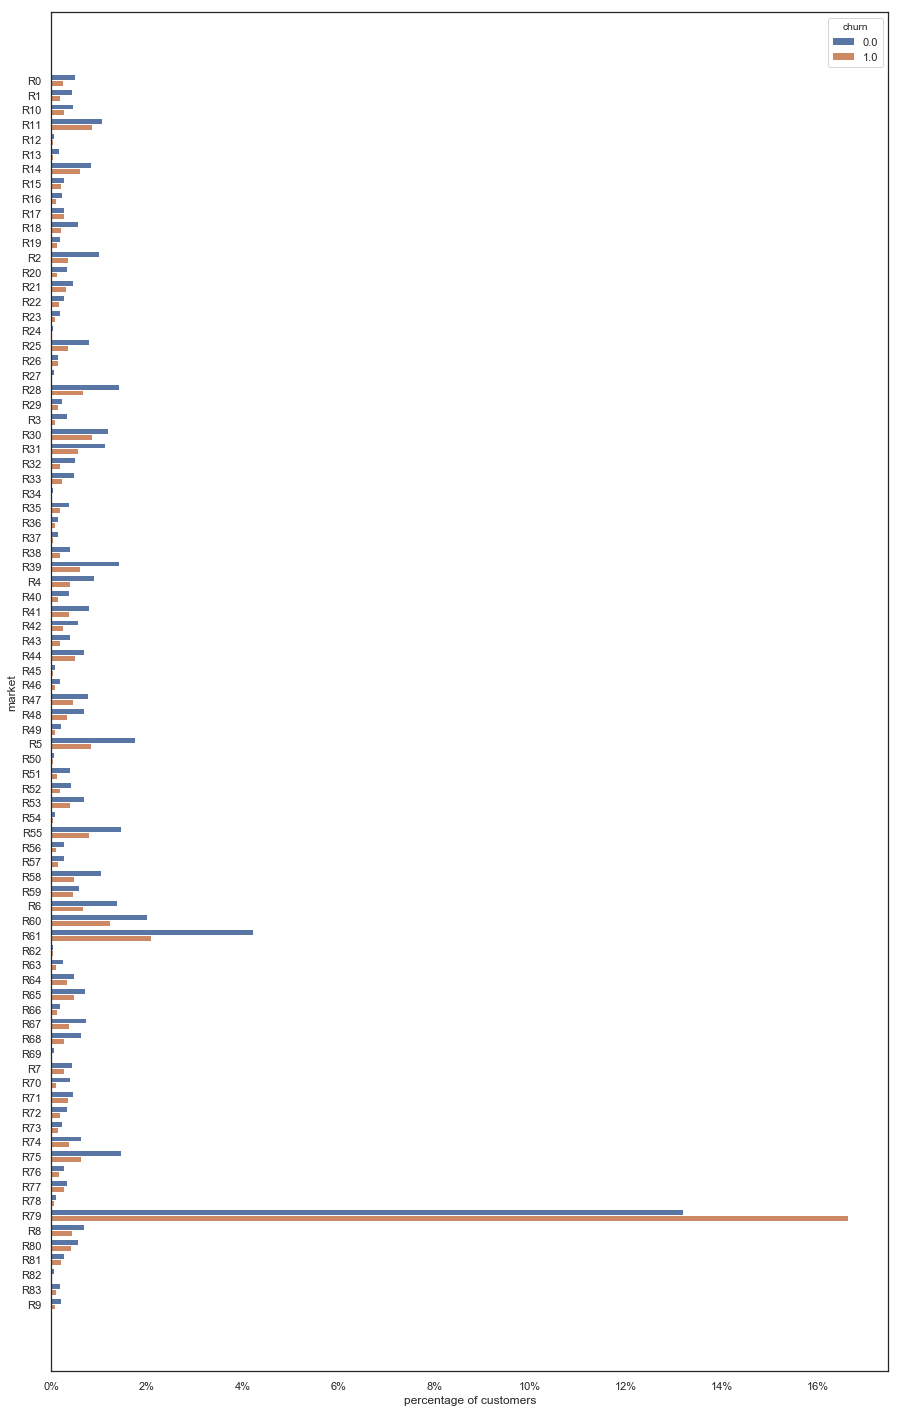

In [98]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers", df=target_df, figsize=(10,10)):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["churn"].value_counts().to_frame()
    g = g.rename({"churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    fig, ax = plt.subplots(figsize=figsize)
    if orient == 'v':
        ax = sns.barplot(x=feature, y=axis_name, hue='churn', data=g, orient=orient, ax=ax)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x=axis_name, y=feature, hue='churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages('market', orient='h', figsize=(15, 25))

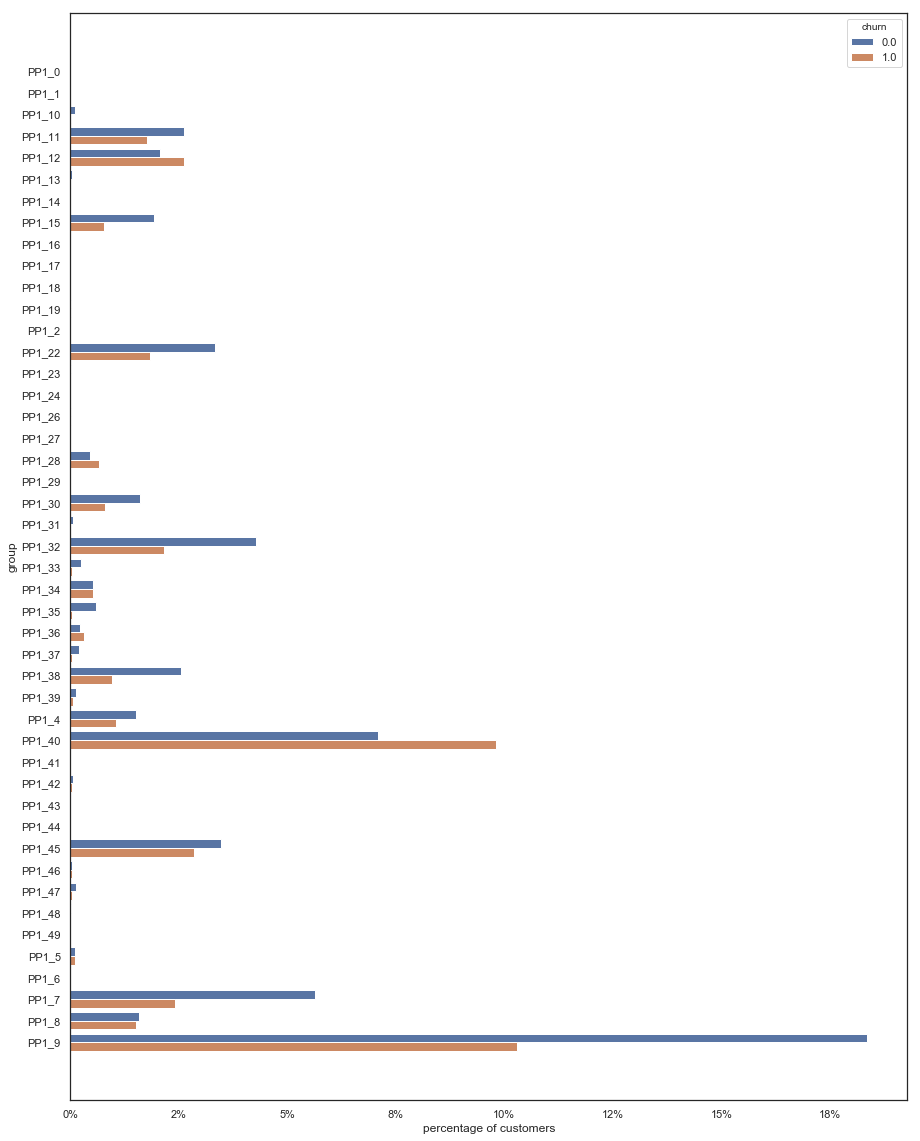

In [99]:
barplot_percentages('group', orient='h', figsize=(15, 20))

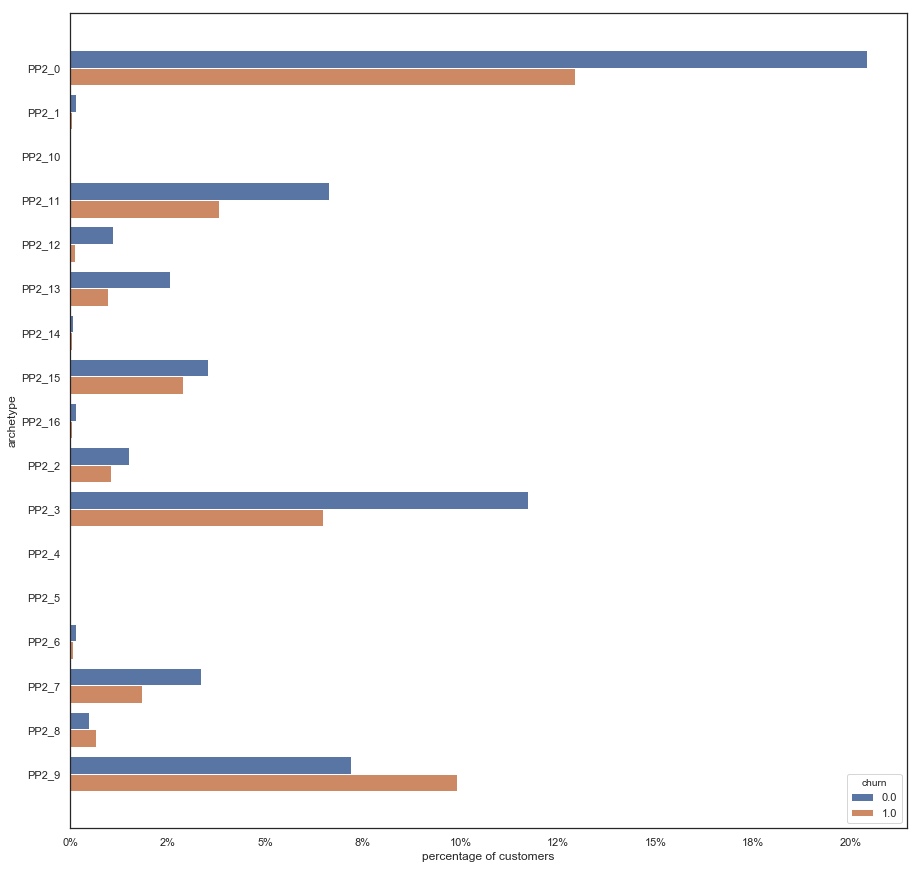

In [100]:
barplot_percentages('archetype', orient='h', figsize=(15, 15))

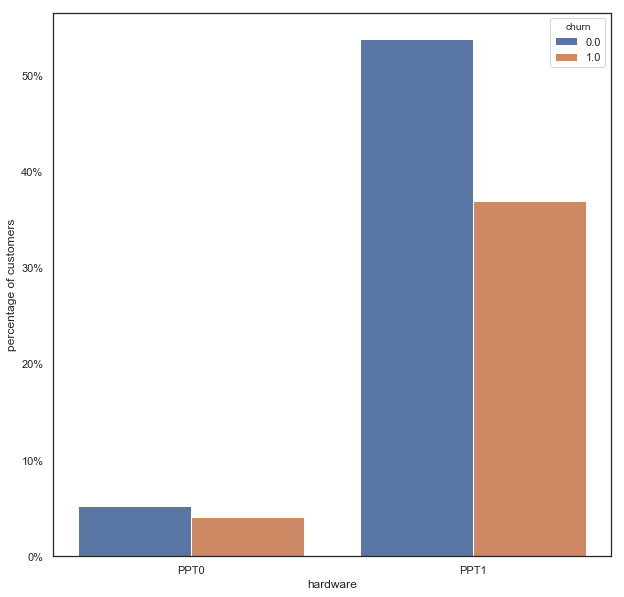

In [101]:
barplot_percentages('hardware')

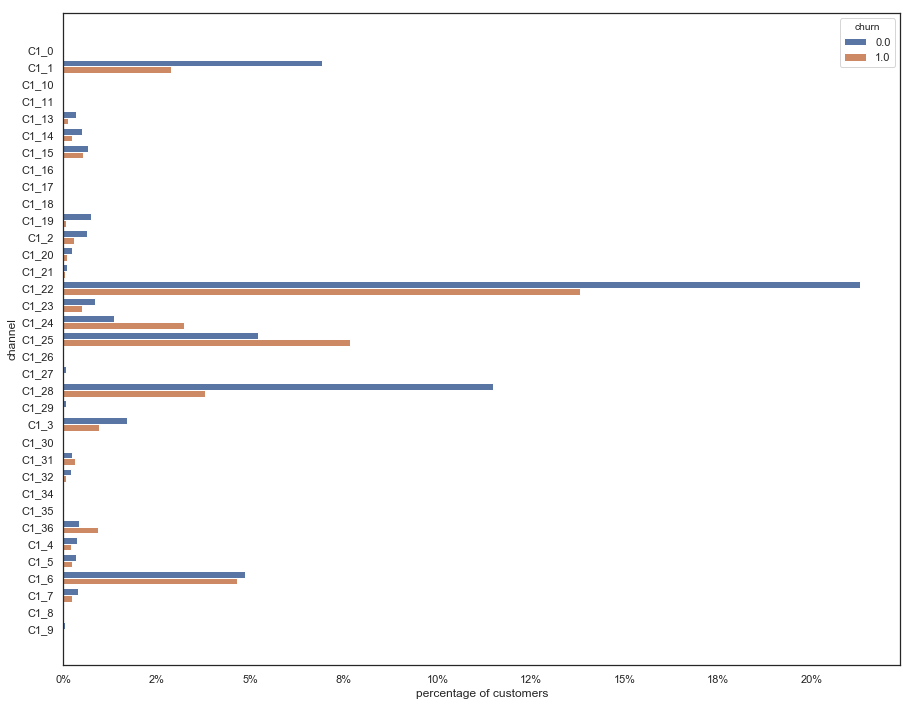

In [102]:
barplot_percentages('channel', orient='h', figsize=(15, 12))

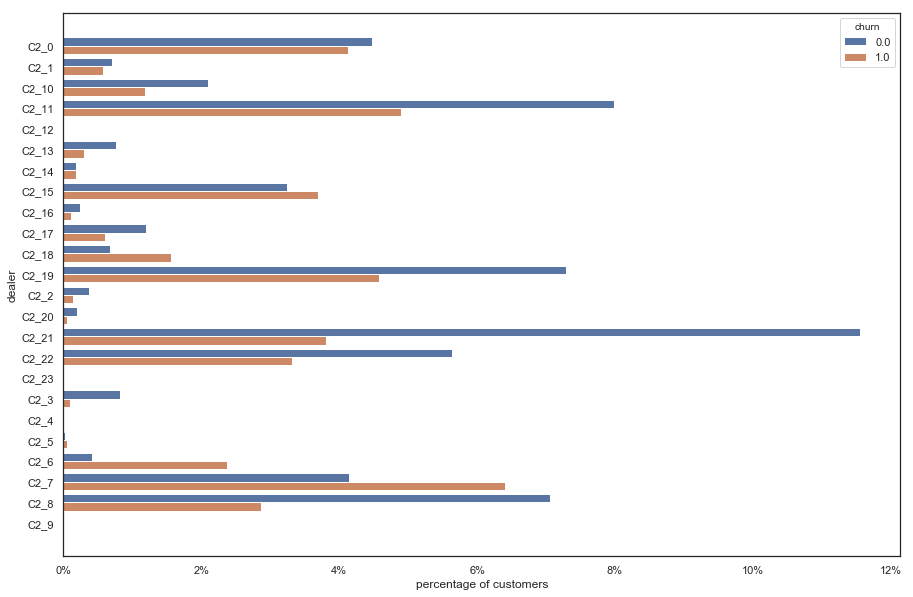

In [103]:
barplot_percentages('dealer', orient='h', figsize=(15, 10))

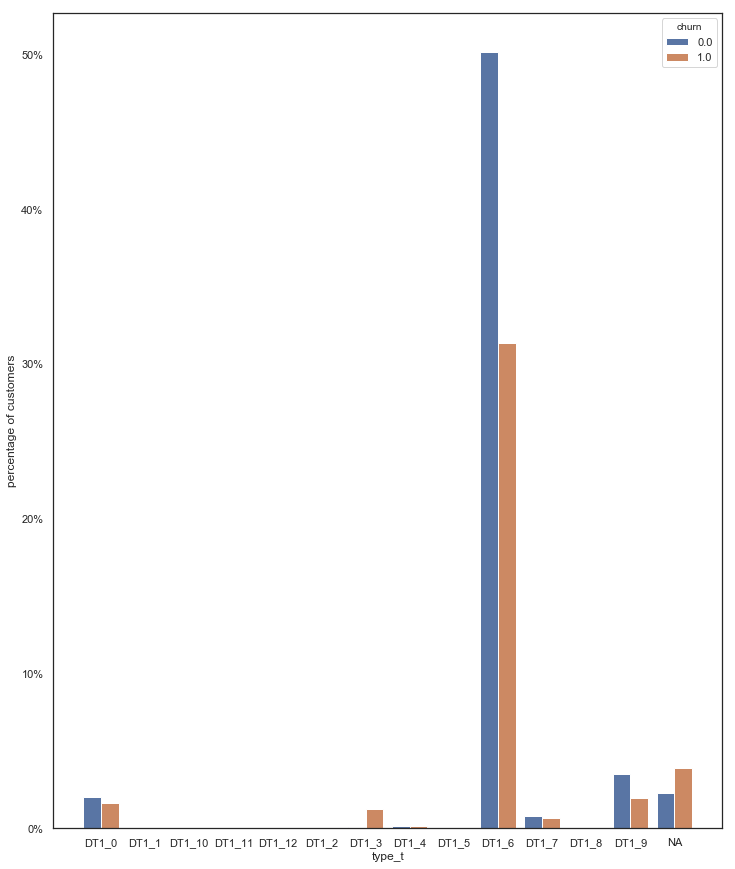

In [104]:
barplot_percentages('type_t', figsize=(12, 15))

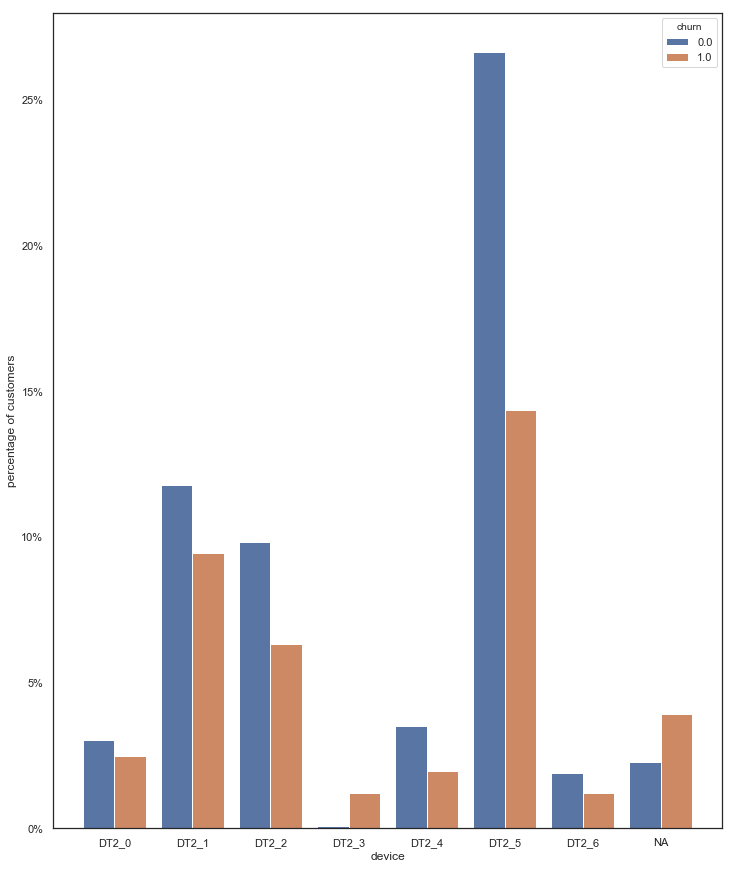

In [105]:
barplot_percentages('device', figsize=(12, 15))

In [107]:
target_df.head()

,client_id,date_reg,market,group,archetype,hardware,channel,dealer,phone,type_t,device,churn
0,09777552-cc75-4f03-9438-11c3a7480f97,2016-05-10 00:00:00.0,R25,PP1_9,PP2_0,PPT1,C1_22,C2_22,D2254,DT1_6,DT2_5,0.0
1,5fbe2ea9-0c80-4164-b703-416b85c23d8c,2016-04-19 00:00:00.0,R25,PP1_9,PP2_0,PPT1,C1_6,C2_0,NA,NA,NA,1.0
2,8cbd48c0-8f90-4f08-bef7-8f09d9924e55,2016-05-19 00:00:00.0,R25,PP1_9,PP2_0,PPT1,C1_6,C2_0,D2594,DT1_6,DT2_5,0.0
3,ffda8d15-cd38-45c3-84ba-29a9811ed79e,2016-05-28 00:00:00.0,R25,PP1_9,PP2_0,PPT1,C1_22,C2_11,D3131,DT1_6,DT2_5,1.0
4,1f9618ad-a980-4110-af32-9741e491a728,2016-05-23 00:00:00.0,R4,PP1_9,PP2_0,PPT1,C1_28,C2_21,D454,DT1_6,DT2_5,0.0


In [111]:
target_df[
    (target_df['phone'] == 'NA') &
    (target_df['type_t'] == 'NA') &
    (target_df['device'] == 'NA')
]['churn'].mean()

0.6329625884732053

In [127]:
def train_test_split(target_df=target_df):
    useful_columns = ['archetype', 'hardware', 'channel', 'dealer', 'type_t', 'device']
    target = ['churn']

    target_df['date_reg'] = pd.to_datetime(target_df['date_reg'])
    target_df['day'] = target_df['date_reg'].map(lambda x: x.day)
    target_df['month'] = target_df['date_reg'].map(lambda x: x.month)

    mask = (target_df['month'] >= 5) & (target_df['day'] >= 13)
    X, y = pd.get_dummies(target_df[useful_columns]), target_df[target]
    X_train, y_train, X_test, y_test = X[~mask], y[~mask], X[mask], y[mask]
    
    X_train, X_test = pd.get_dummies(X_train), pd.get_dummies(X_test)
    
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = train_test_split(target_df=target_df)

In [128]:
X_train.head()

,archetype_PP2_0,archetype_PP2_1,archetype_PP2_10,archetype_PP2_11,archetype_PP2_12,archetype_PP2_13,archetype_PP2_14,archetype_PP2_15,archetype_PP2_16,archetype_PP2_2,...,type_t_DT1_9,type_t_NA,device_DT2_0,device_DT2_1,device_DT2_2,device_DT2_3,device_DT2_4,device_DT2_5,device_DT2_6,device_NA
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [129]:
X_test.head()

,archetype_PP2_0,archetype_PP2_1,archetype_PP2_10,archetype_PP2_11,archetype_PP2_12,archetype_PP2_13,archetype_PP2_14,archetype_PP2_15,archetype_PP2_16,archetype_PP2_2,...,type_t_DT1_9,type_t_NA,device_DT2_0,device_DT2_1,device_DT2_2,device_DT2_3,device_DT2_4,device_DT2_5,device_DT2_6,device_NA
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
params = {'random_state': 0, 'n_jobs': 8, 'n_estimators': 500, 'max_depth': 300}


clf = RandomForestClassifier(**params)
clf = clf.fit(X_train, y_train)
print(roc_auc_score(y_test, clf.predict(X_test)))

0.6197401113008343


In [141]:
from sklearn.ensemble import GradientBoostingClassifier

params = {'random_state': 0, 'n_estimators': 100, 'max_depth': 80}


# gbc = GradientBoostingClassifier(**params)
# gbc = gbc.fit(X_train, y_train)
# print(roc_auc_score(y_test, gbc.predict(X_test)))

In [146]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

lrc = LogisticRegression()
lrc = lrc.fit(X_train, y_train)
print(roc_auc_score(y_test, lrc.predict(X_test)))

0.6102218893092312


In [151]:
import xgboost as xgb

xgtrain = xgb.DMatrix(X_train.values, y_train.values)
xgtest = xgb.DMatrix(X_test.values)

param = {'max_depth':200, 'eta':1, 'objective':'binary:logistic' }
num_round = 10
bst = xgb.train(param, xgtrain, num_round)
# make prediction
preds = bst.predict(xgtest)

print(roc_auc_score(y_test, preds))

0.6906091185117094
